In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
# Import the time module.
import time
from scipy.stats import linregress



In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=db271b578383d9969a7095867f531d51


In [7]:

# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1



Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | mukhen
Processing Record 2 of Set 1 | hamilton
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | kupang
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | kenai
Processing Record 8 of Set 1 | isiro
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | haines junction
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | douentza
Processing Record 14 of Set 1 | yeppoon
Processing Record 15 of Set 1 | chapais
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | necochea
Processing Record 18 of Set 1 | axim
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | kruisfontein
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | ituni
City not found. Skipping...
Processing Record 23 of Set 1 | saskylakh
Processing Record 24 of Set 1 | 

Processing Record 43 of Set 4 | sorvag
City not found. Skipping...
Processing Record 44 of Set 4 | tuy hoa
Processing Record 45 of Set 4 | general teran
Processing Record 46 of Set 4 | ilulissat
Processing Record 47 of Set 4 | ancud
Processing Record 48 of Set 4 | belyy yar
Processing Record 49 of Set 4 | makakilo city
Processing Record 50 of Set 4 | lasa
Processing Record 1 of Set 5 | kubachi
Processing Record 2 of Set 5 | katsuura
Processing Record 3 of Set 5 | norman wells
Processing Record 4 of Set 5 | alofi
Processing Record 5 of Set 5 | louisbourg
City not found. Skipping...
Processing Record 6 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 7 of Set 5 | te anau
Processing Record 8 of Set 5 | svetlyy
Processing Record 9 of Set 5 | kpandae
Processing Record 10 of Set 5 | uhlove
Processing Record 11 of Set 5 | rieti
Processing Record 12 of Set 5 | bijie
Processing Record 13 of Set 5 | billings
Processing Record 14 of Set 5 | ayorou
Processing Record 15 of Set 

Processing Record 34 of Set 8 | chioggia
Processing Record 35 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 36 of Set 8 | mananjary
Processing Record 37 of Set 8 | sorong
Processing Record 38 of Set 8 | camrose
Processing Record 39 of Set 8 | assiniboia
Processing Record 40 of Set 8 | lakatoro
Processing Record 41 of Set 8 | kidal
Processing Record 42 of Set 8 | palafrugell
Processing Record 43 of Set 8 | umm kaddadah
Processing Record 44 of Set 8 | ugoofaaru
Processing Record 45 of Set 8 | khormuj
City not found. Skipping...
Processing Record 46 of Set 8 | padang
Processing Record 47 of Set 8 | mezen
Processing Record 48 of Set 8 | puerto baquerizo moreno
Processing Record 49 of Set 8 | kamenka
Processing Record 50 of Set 8 | skelleftea
Processing Record 1 of Set 9 | artyk
City not found. Skipping...
Processing Record 2 of Set 9 | beringovskiy
Processing Record 3 of Set 9 | yanchukan
City not found. Skipping...
Processing Record 4 of Set 9 | lolua
City not found. S

City not found. Skipping...
Processing Record 22 of Set 12 | yibin
Processing Record 23 of Set 12 | khandyga
Processing Record 24 of Set 12 | nyurba
Processing Record 25 of Set 12 | uk
City not found. Skipping...
Processing Record 26 of Set 12 | coruripe
Processing Record 27 of Set 12 | erenhot
Processing Record 28 of Set 12 | delta del tigre
Processing Record 29 of Set 12 | muli
Processing Record 30 of Set 12 | mao
Processing Record 31 of Set 12 | haibowan
City not found. Skipping...
Processing Record 32 of Set 12 | trairi
Processing Record 33 of Set 12 | dehui
Processing Record 34 of Set 12 | savinka
Processing Record 35 of Set 12 | mayumba
Processing Record 36 of Set 12 | wanning
Processing Record 37 of Set 12 | aklavik
Processing Record 38 of Set 12 | andevoranto
City not found. Skipping...
Processing Record 39 of Set 12 | ternate
Processing Record 40 of Set 12 | sakakah
Processing Record 41 of Set 12 | matagami
Processing Record 42 of Set 12 | polunochnoye
Processing Record 43 of 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mukhen,48.10,136.10,39.51,74,100,6.15,RU,2020-10-31 12:57:45
1,Hamilton,39.18,-84.53,37.00,80,1,6.93,US,2020-10-31 12:57:45
2,Dikson,73.51,80.55,16.72,95,100,21.65,RU,2020-10-31 12:57:45
3,Tuktoyaktuk,69.45,-133.04,2.91,92,97,7.40,CA,2020-10-31 12:57:46
4,Kupang,-10.17,123.58,81.63,75,84,5.99,ID,2020-10-31 12:57:46
...,...,...,...,...,...,...,...,...,...
569,Rapar,23.57,70.63,84.94,29,0,4.65,IN,2020-10-31 12:58:31
570,Emerald,-23.53,148.17,77.00,20,0,6.93,AU,2020-10-31 12:58:31
571,Ahipara,-35.17,173.17,62.55,96,34,5.75,NZ,2020-10-31 12:58:31
572,Ibb,13.97,44.18,70.20,42,91,5.57,YE,2020-10-31 12:58:31


In [13]:
#re order o columns
new_column_order = ["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [14]:
#assigning new order to DF 

city_data_df = city_data_df[new_column_order]

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mukhen,RU,2020-10-31 12:57:45,48.10,136.10,39.51,74,100,6.15
1,Hamilton,US,2020-10-31 12:57:45,39.18,-84.53,37.00,80,1,6.93
2,Dikson,RU,2020-10-31 12:57:45,73.51,80.55,16.72,95,100,21.65
3,Tuktoyaktuk,CA,2020-10-31 12:57:46,69.45,-133.04,2.91,92,97,7.40
4,Kupang,ID,2020-10-31 12:57:46,-10.17,123.58,81.63,75,84,5.99
5,Hobart,AU,2020-10-31 12:54:05,-42.88,147.33,55.40,76,75,1.12
6,Kenai,US,2020-10-31 12:57:46,60.55,-151.26,12.20,78,1,3.36
7,Isiro,CD,2020-10-31 12:57:46,2.77,27.62,76.64,91,99,0.65
8,Hermanus,ZA,2020-10-31 12:57:46,-34.42,19.23,72.00,48,0,10.00
9,Haines Junction,CA,2020-10-31 12:57:46,60.75,-137.51,14.00,85,100,2.24


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

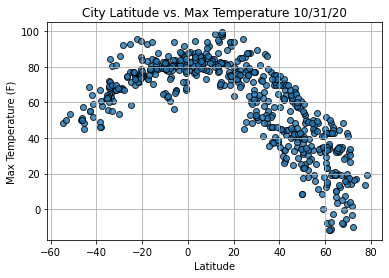

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

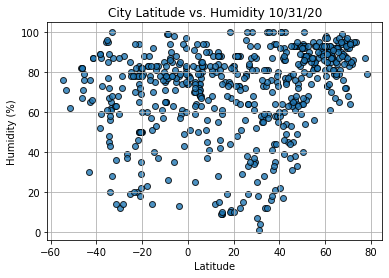

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

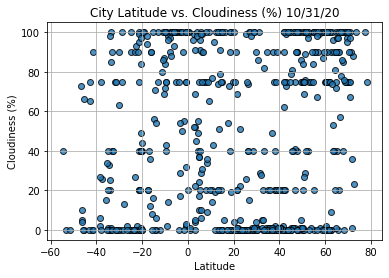

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

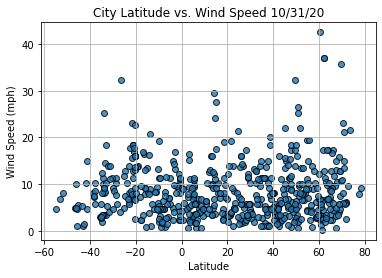

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

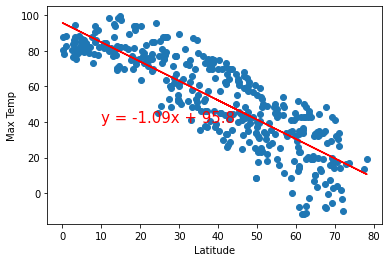

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))


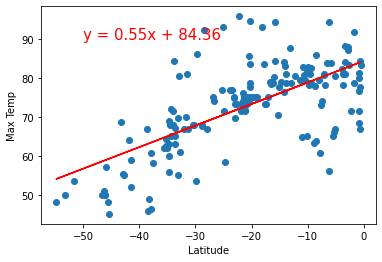

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

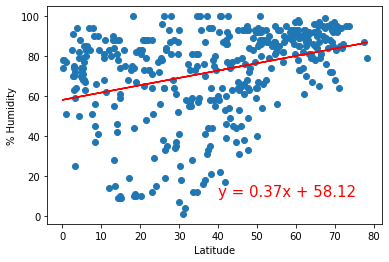

In [26]:
#Linear Regression on the Percent Humidity for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

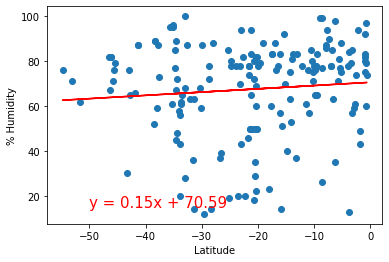

In [27]:
# Linear regression on the Percent Humidity  Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

In [28]:
#The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 
#for the Northern and Southern Hemispheres for the plots shown here. 
#This means that percent humidity is unpredictable due to changing weather patterns that can increase 
#or decrease percent humidity. Check the r-values for your plots. 

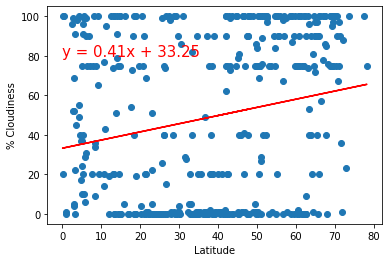

In [40]:
#Linear Regression on the Percent Cloudiness for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(0,80))

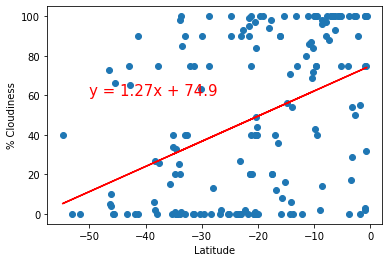

In [30]:
#Linear Regression on the Percent Cloudiness for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

In [ ]:
#The correlation between the latitude and percent cloudiness is very low because the r-value 
#is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere 
#for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns 
#that can increase or decrease percent cloudiness. Check the r-values for your plots. 

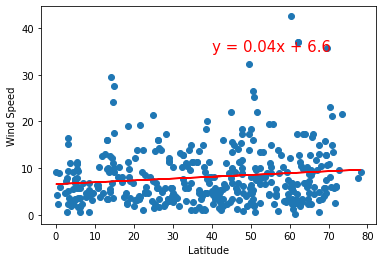

In [32]:
#6.4.5 Correlation Between Latitude and Wind Speed
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

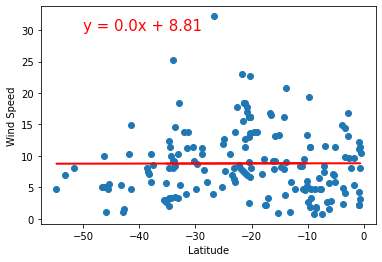

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,30))


In [ ]:
#finding The correlation between the latitude and wind speed is very 
#low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for 
#the Southern Hemisphere for the plots shown here. This means that wind speed is 
#unpredictable due to changing weather patterns that can increase or decrease wind speed. 
